9.1 클래스 구성 및 정의  
9.2 객체 생성  
9.3 객체의 멤버 접근  
9.4 self  
9.5 __init__() 초기화 메소드  
9.6 내장 클래스

__9.1 클래스 구성 및 정의__

In [ ]:
# 멤버함수, 멤버변수
class Cexm:
    def fsam(self):
        print("멤버함수(메소드)")
    def fsbm(self, pa):
        self.x = pa
        print("멤버변수 x 는", self.x)

ca = Cexm() #객체 생성
ca.fsam()   #멤버함수 호출
ca.fsbm(10)

In [1]:
# 멤버 함수 정의시 매개변수에 반드시 self를 사용해야함
# (객체생성, 메소드 호출 시)self 매개변수에는 명시적으로 인자를 전달하지 않음
# pa, pb, y는 모두 멤버변수 

class Cexm:
     
     # self 매개변수가 없으므로 멤버함수가 아님
    def fssam():
         print("멤버함수가 아니다")
    def fsam(self):
         print("멤버 함수(메소드)")
    def __init__(self, pa, pb): #------------> ①
          self.x = pa
          y = pb    # self를 사용하지 않은 매개변수 - 멤버변수가 아님
          print("멤버 변수 x 는", self.x) #-> ③
          print("변수 y 는", y) #-> ③

ca = Cexm(10, 20)# --------------------------> ②
ca.fsam()

멤버 변수 x 는 10
변수 y 는 20
멤버 함수(메소드)


In [ ]:
# (GPT) 멤버변수는 클래스변수, 인스턴스 변수로 나뉨

class MyClass:
    # 클래스 변수
    class_variable = "Shared by all instances"

    def __init__(self, value):
        # 인스턴스 변수
        self.instance_variable = value

    def method(self):
        # 로컬 변수
        local_variable = "I exist only in this method"
        print(local_variable)

# 객체 생성
obj = MyClass("Instance-specific value")
print(obj.class_variable)      # Shared by all instances
print(obj.instance_variable)   # Instance-specific value
obj.method()                   # I exist only in this method


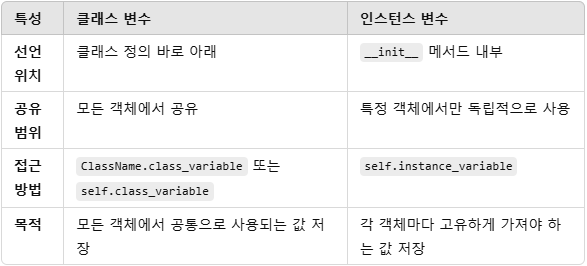

In [ ]:
# (번외)클래스 변수 자리에 self. 키워드를 써서 멤버변수(인스턴스변수)를 만들수 있나? - 오류발생

class MyClass:
    self.variable = 10  # SyntaxError: cannot use 'self' in class body
    
    def __init__(self, value):
        # 멤버 변수
        self.instance_variable = value
        


__9.2 클래스와 객체__

In [2]:
# 클래스가 객체를 생성-인스턴스화
# 문자열 "abc"를 변수 stra에 저장한다 =  "abc"를 가리키는 주소 데이터를 변수 stra(객체 stra)에 저장한다
# 파이썬에서 변수는 객체
stra = "abc"
print(stra)

abc


In [4]:
# str은 파이썬의 built-in(내장) 클래스
# 아래 코드에서 str 클래스의 객체를 생성하면서 문자열 "abc"를 인수로 받는 __init __(self, pa) 메소드 호출
strb=str("abc")
print(strb)

# str클래스의 멤버함수 capitalize() 호출
strc=strb.capitalize()
print(strc)

abc
Abc


In [6]:
# 번외 upper(), lower(), capitalize
text = "hello, Python!"

print(text.upper())
print(text.lower())
print(text.capitalize())    #영어 첫글자만 대문자로

HELLO, PYTHON!
hello, python!
Hello, python!


In [ ]:
# 클래스와 메소드를 이용해서 계산기 기능 구현
# result변수는 생성자에 쓰이지도 않았는데
class Calculator:
    def setinit(self):
        self.result = 0
    
    def adder(self, num):
        self.result = self.result + num
        return self.result
    
cal1 = Calculator()
cal1.setinit()
print(cal1.adder(3))
print(cal1.adder(4))

cal2 = Calculator()
cal2.setinit()
print(cal2.adder(3))
print(cal2.adder(7))

생성자 __init()__ 밖에 선언되더라도 self. 매개변수만 사용하면 멤버변수이고 객체 내 어디서나 사용가능

위 코드에서 result와 같이 init() 밖에서 선언된 멤버변수는 인스턴스 변수인가?
(GPT)
self.result는 self를 통해 선언되었기 때문에 인스턴스 변수입니다.
일반적으로는 __init__ 메서드 내부에 멤버 변수(인스턴스 변수)를 선언하는 것이 맞음
이유는 __init__이 객체가 생성될 때 자동으로 호출되기 때문에, 
모든 멤버 변수를 한곳에서 초기화할 수 있고, 코드의 가독성과 유지보수성이 높아지기 때문입니다.

In [9]:
# 생성자: __init()__ 메소드: 객체가 생성될 때 자동을 호출되는 특수한 초기화 메소드
# 클래스에서 반드시 실행되어야 하는 기능이 있다면,
# (위 계산기 코드처럼) 명시적으로 호출하는 대신 생성될 떄 자동으로 호출되게 함
class Calculator:
    def __init__(self):
        self.result = 0
    
    def adder(self, num):
        self.result = self.result + num
        return self.result
cal1 = Calculator()
cal2 = Calculator()

print(cal1.adder(3))    # 0+3
print(cal1.adder(4))
print(cal2.adder(3))
print(cal2.adder(7))

3
7
3
10


In [ ]:
# (번외) init()메소드에서 리턴값을 넣으면? - TypeError: __init__() should return None, not 'str'
class MyClass:
    def __init__(self):
        return "Hello"  # 잘못된 코드: 반환값 존재

obj = MyClass()

In [ ]:
# 생성자, 멤버함수
class Car:
    def __init__(self, pnum, pspeed):
        self.num = pnum
        self.speed = pspeed
    def fprint(self):
        print("차량번호", self.num)
        print("속도는", self.speed)        
        
new_car = Car(2023, 90)
new_car.fprint()

In [11]:
# (문제3)디폴트 매개변수를 이용하여 제시된 화면 출력 결과가 나오도록 fadd 함수를 정의하세요.
def fadd(a=1,b=2):
    x=a
    y=b
    hap=x+y
    return hap

ohap=fadd(10, 20)
print("ohap의 값은", ohap)
ohap2=fadd(10)
print("ohap2의 값은", ohap2)
ohap3=fadd()
print("ohap2의 값은", ohap3)

ohap의 값은 30
ohap2의 값은 12
ohap2의 값은 3


In [12]:
#(문제4) 디폴트 매개변수의 사용을 응용하여 클래스를 변경해 보세요.
class Cadd:
    def fadd(self, a=1, b=2):
        self.x=a
        self.y=b
        self.hap=self.x+self.y

obj=Cadd()
obj.fadd(10, 20)
print("객체 obj 내의 인스턴스 변수 hap의 값은", obj.hap)
obj.fadd(10)
print("객체 obj 내의 인스턴스 변수 hap의 값은", obj.hap)
obj.fadd()
print("객체 obj 내의 인스턴스 변수 hap의 값은", obj.hap)

객체 obj 내의 인스턴스 변수 hap의 값은 30
객체 obj 내의 인스턴스 변수 hap의 값은 12
객체 obj 내의 인스턴스 변수 hap의 값은 3


In [ ]:
class Car:
    def __init__(self, pnum, pspeed):
        self.num = pnum
        self.speed = pspeed
    def fprint(self):
        print("차량번호", self.num)
        print("속도는", self.speed)        
        
new_car = Car(2023, 90)
new_car.fprint()

In [18]:
'''
•다음과 같은 속성과 동작을 포함하는 동물(Animal) 클래스를 생성하고, 
고양이(cat) 객체를 생성하여 속성을 출력하고 동작을 수행하시오.
- 속성: 이름(name)=‘고양이’
- 동작: ‘야옹’소리내다(sound)
'''
class Animal:
    
    def __init__(self, name):
        self.name = name
    
    def fprint(self):
        print(self.name)
    
    def act(self):
        print('야옹 소리내다')
        

cat = Animal('고양이')
#cat.fprint()
print(cat.name)
cat.act()

고양이
야옹 소리내다


In [14]:
'''
•다음과 같은 속성과 동작을 포함하는 과일(Fruit) 클래스를 생성하고, 
오렌지(orange) 객체를 생성하여 속성을 출력하고 동작을 수행하시오.
- 속성: 이름(name)=‘오렌지’, 색상(color)=‘노란색’
- 동작: ‘새콤하다’맛이나다(taste)
'''
class Fruit:
    def __init__(self, name, color):
        self.name = name
        self.color = color
        
    def fprint(self):
        print(self.name)
        print(self.color)

    def taste(self):
        print('새콤한 맛이 나다')

orange = Fruit('오렌지', '주황색')

# 속성 출력
orange.fprint()

# 동작 수행
print(orange.taste())  # 오렌지는 새콤하다!

오렌지
주황색
새콤한 맛이 나다
None


클래스에서 속성(atrribute) = 멤버변수?

(4슬라이드)
맴버 변수 (Member Variable)
-클래스의 속성, 명사로 표현

맴버 함수 (Method, 메서드)
- 클래스의 동작을 구현한 함수, 동사로 표현
- 매개변수로 self가 포함된 함수

---

In [20]:
# 3. 내부 코드가 없는 핸드폰 (Phone) 클래스를 "정의" 해보세요

class Phone:
    pass

my_phone = Phone()

In [21]:
# 5. 핸드폰 (Phone) 클래스에 "휴대폰 생성"를 출력하는 생성자를 추가하세요.
class Phone:
    def __init__(self):
        print('휴대폰 생성')

my_phone = Phone()

휴대폰 생성


In [22]:
# 6. 핸드폰 (Phone) 클래스에 (제조사, 출고년도, 색상)을 입력받는 생성자를 추가하세요.

class Phone:
    def __init__(self, manufacturer, released_year , color):
        print('휴대폰 생성')
        self.제조사 = manufacturer
        self.출고년도 = released_year
        self.색상 = color

my_phone = Phone('삼성', '2025', '블랙')

휴대폰 생성


In [24]:
# 7. 앞서 생성한 인스턴스의 제조사, 출고년도, 색상을 출력하시오.

class Phone:
    def __init__(self, manufacturer, released_year, color):
        print('휴대폰 생성')
        self.제조사 = manufacturer
        self.출고년도 = released_year
        self.색상 = color
        

my_phone = Phone('삼성', '2025', '블랙')
print(my_phone.제조사)
print(my_phone.출고년도)
print(my_phone.색상)

휴대폰 생성
삼성
2025
블랙


In [25]:
# 8. 핸드폰 (Phone) 클래스에서 제조사, 출고년도, 색상을 출력하는 info() 메소드를 추가하세요.

class Phone:
    def __init__(self, manufacturer, released_year, color):
        print('휴대폰 생성')
        self.제조사 = manufacturer
        self.출고년도 = released_year
        self.색상 = color
        
    def info(self):
        print(self.제조사)
        print(self.출고년도)
        print(self.색상)

my_phone = Phone('삼성', '2025', '블랙')
my_phone.info()

휴대폰 생성
삼성
2025
블랙


In [26]:
# 9. 핸드폰 (Phone) 클래스에 (제조사, 출고년도, 색상)을 받는 setInfo 메소드를 추가하세요.

class Phone:
    def __init__(self, 제조사, 출고년도, 색상):
        print('휴대폰 생성')
        self.제조사 = 제조사
        self.출고년도 = 출고년도
        self.색상 = 색상
        
    def info(self):
        print(self.제조사)
        print(self.출고년도)
        print(self.색상)
        
    def setinfo(self, 제조사, 출고년도, 색상):
        self.제조사 = 제조사
        self.출고년도 = 출고년도
        self.색상 = 색상

my_phone = Phone('삼성', '2025', '블랙')
my_phone.setinfo('애플', '2024', '화이트')
my_phone.info()

휴대폰 생성
애플
2024
화이트


In [ ]:
# 10. 다음 self 를 설명한 내용 중 틀린 것은?
# a. 해당 클래스의 객체를 의미
# b. 클래스 내 메서드의 두 번째 매개변수로 사용
# c. 클래스를 통해 생성된 객체를 구분하기 위해 사용
# d. self 객체를 통해 변수와 메서드 호출 가능


